# Lecture 2, Data science in Neuroscience


## Plan for today

1. Review NumPy arrays
2. Introduction to machine learning
3. Quizz on machine learning
4. Simple example of how computers learn from data (linear regression with data from a speed cell).

***

## Review NumPy arrays

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

In [4]:
ones = np.ones(4)
ones

array([1., 1., 1., 1.])

Use `type()` to make sure you are working with a NumPy array.

In [5]:
print("type:",type(a))

type: <class 'numpy.ndarray'>


Then use the 4 attributes (ndim,shape,size,dtype) to know the properties of the array.

In [6]:
print("ndim:",a.ndim)
print("shape:",a.shape)
print("size:",a.size)
print("dtype:",a.dtype)

ndim: 1
shape: (4,)
size: 4
dtype: int64


We can do math with array of the same shape.

In [8]:
a.shape,ones.shape

((4,), (4,))

In [9]:
a+ones

array([2., 3., 4., 5.])

2D arrays are like Excel sheets or images. 

In [23]:
b = np.array([[1,2]])
b

array([[1, 2]])

In [24]:
b.shape

(1, 2)

In [25]:
f = np.arange(24)
f

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [26]:
f.shape

(24,)

In [29]:
f = f.reshape(-1,2)
f

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

In [30]:
b.shape,f.shape

((1, 2), (12, 2))

We can do mathematical operations with two arrays that do not have the same shape using **broadcasting**.

```
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when

* they are equal, or
* one of them is 1
```

In [28]:
f+b

array([[ 1,  3],
       [ 3,  5],
       [ 5,  7],
       [ 7,  9],
       [ 9, 11],
       [11, 13],
       [13, 15],
       [15, 17],
       [17, 19],
       [19, 21],
       [21, 23],
       [23, 25]])

## Introduction to machine learning

What is machine learning?


**Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed.**

**The computer learns from input data to achieve a specific objective.**

Examples: 

* A program learns to identify the nose, ears and tail of a mouse in images (very complex model). 
* A program learns the linear relationship between the firing rate of a neuron and the running speed of an animal (very simple model).


## Why should you care about machine learning as a Neuroscientist?


Machine learning is behind many modern tools used by neuroscients.

* [Track behavior with DeepLabCut](https://www.nature.com/articles/s41593-018-0209-y)
* [Image segmentation (e.g., cell counting) using a U-Net](https://www.nature.com/articles/s41592-018-0261-2)
* [Spike extraction and clustering with Kilosort](https://www.biorxiv.org/content/10.1101/061481v1)

These are state-of-the-art software in their respective field.

They make new experiments possible. They can discover patterns in your data. They can save you a lot of time (e.g., labeling images).

## Objectives for this week

* Understand what machine learning is
* Get faminiar with the terminology
* Experiment with a few examples
* Learn to go from a simple math formula to python code
* Perform a matrix multiplication using NumPy
* Go through the main loop that allows a computer to learn from data

***
## Definition of machine learning

* Input: $X$ (single number or an array)
* Output: $Y$ (single number or an array)
* Unknown function or model: $f()$
* Random error: $\epsilon$

$Y = f(X) + \epsilon $

Machine learning refers to a set of approaches for estimating the best parameters in $f()$

$f()$ can be the the equation for a line with 2 parameters or a deep neural network with millions of parameters.

***
## What is learning?

Learning can be defined as finding the best model parameters to solve a problem.

**Simple example**: Find the relationship between the running speed of an animal ($x$) and the firing rate of a neuron ($y$) with a linear regression model. A linear regression has 2 parameters ($a$ and $b$).

$y = a*x + b $

**Complex example**: Find a mouse in an image using a deep neural network. We are dealing with millions of parameters.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>



***
# Terminology in machine learning

## Prediction versus inference

Why do we want to estimate $f$?


### Prediction

* We focus on predicting $Y$.
* $f$ is treated as a black box. We don't care about the model, as long as it works.

### Inference

* **Understand** a phenomena by modelling it.
* Which predictors are associated with the response?
* Is the relation between $Y$ and each predictor adequately summarized using a linear equation?


***
## Supervised versus unsupervised

### Supervised
* The training set contains **labeled data**.
* For each observation of the predictors $X_{i}, i = 1,...,n$ there is a known response measurement $y_{i}$.
* Example: linear regression

### Unsupervised
* Uncovering hidden patterns from unlabeled data.
* For each observation $i = 1,...,n$, we observed a vector of measurements $X_{i}$, but no response $y_{i}$.
* Examples: PCA and k-means clustering used in lecture 3.


***
## Regression versus classification

### Regression

* $Y$ is a continuous variable.
* We want to predict continuous values (firing rate, temperature, salaries, etc.)

### Classification

* $Y$ is a categorical variable.
* We want to classify cats and dogs in images or we want to classify neurons as excitatory and inhibitory based on their properties (e.g., firing rate).


***
## Training loop

Many models are trained using a training loop. In programing language, this is just a `for` loop.

At the beginning you initialize the model with random parameters.

Then, for each iteration:

1. Feed data with labels to your model
2. Calculate the error of your model (using a loss function).
3. Adjust the model parameters by a small amount to reduce the error.

You repeat these 3 steps until the model predicts the data. 


<div>
<img src="../images/my_training_loop.png" width="600"/>
</div>



***
## Training and test sets

### Training set

* The observations (data points) that we use to estimate $f$ (to train our model). 

### Test set

* Observations used to test how accurate our model is. The model has never "seen" this data because they are not used during training!

* The test set is very important when using complex models with many parameters. Complex models can learn to perform great on your training set but may generalize very poorly to new data. This is called **overfitting**. You can assess whether your model is overfitting using a test set.


***
## Time for a quizz!

[Quizz link](https://forms.gle/SPvgZEH63Lpa8Uyn8)

https://forms.gle/SPvgZEH63Lpa8Uyn8

You have 7 minutes to complete the questions.


*** 
## Linear algebra and machine learning

In machine learning, data are stored in vectors and matrices. 

Models usually take vectors, matrices, or N-dimension arrays as inputs.

In **NumPy**, vectors are like 1-dimensional arrays, and matrices are like 2-dimensional arrays.  

### Matrix multiplication

Machine learning often involves matrix multiplication. Here is what we need to know for today.

* In NumPY, the `@` operator is used to compute the matrix product between 2d arrays. Alternatively, use `numpy.matmul()`.

* For matrix multiplication, the number of columns in the first matrix must equal the number of rows in the second matrix. 


Here is how a matrix multiplication works.

$ 
a = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
$

$ 
b = \begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
$

$
a@b =
\begin{bmatrix}
1*1 + 2*2 + 3*3 \\
4*1 + 5*2 + 6*3  
\end{bmatrix}
$

In [50]:
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
a.shape

(2, 3)

In [52]:
b = np.array([[1],[2],[3]])
b

array([[1],
       [2],
       [3]])

In [53]:
b.shape

(3, 1)

In [54]:
c = a@b
c

array([[14],
       [32]])

In [55]:
c.shape

(2, 1)

a@b is not the same as b@a.

This is enough linear algebra for today.

***
# Using machine learning to characterize a speed cell.

**Speed cell**: Neuron that increases its firing rate when the animal runs at higher speed. These neurons have been observed in several brain areas, including the medial entorhinal cortex, hippocampus, and visual cortex.

[Speed cells in the medial entorhinal cortex (2015) Nature](https://www.nature.com/articles/nature14622)


<div>
<img src="../images/speed_kropff.png" width="800"/>
</div>


## Our task

Write and **train a linear model** that will describe how the firing rate of a neuron is related to the running speed of a mouse.

Because we want to understand how machine learning works under the hood, we will do all the steps without using external libraries like scipy, scikit-learn or pytorch.



## A simulated speed cell

To know if our modeling approach is working, it is useful to start with simulated data. The main advantage is that we know the exact parameters that were used when generating the data. If your approach works, it should find the same parameters.

* When coding, it is usually a good idea to start with simulated data. Some problems will be easier to fix. You can easily manipulated/change simulated data and assess the effect on your model.
* Try to make your simulated data as similar as the real data with which you plan to use the model.


#### Running speed data from a running mouse

We can load speed data from a real experiment with a mouse running in a maze. The file contains the running speed of the mouse as a function of time. The sampling rate was 50 Hz.

The duration of the recording is 546 seconds.

In [145]:
import numpy as np
import matplotlib.pyplot as plt

In [146]:
fn = "../data/animal_speed.npy"

In [147]:
speed = np.load(fn)
# get some information about the data just loaded
print(type(speed), speed.ndim, speed.shape)

<class 'numpy.ndarray'> 1 (27304,)


Always inspect your data with a few plots

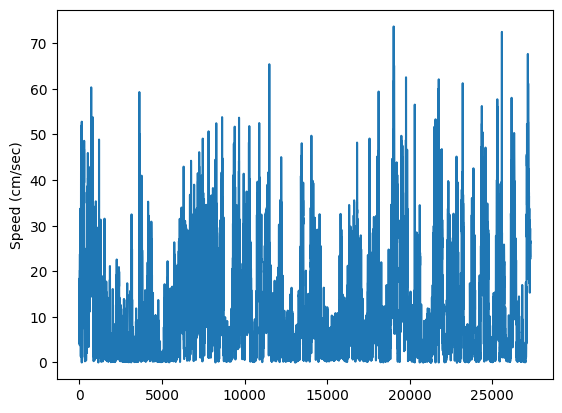

In [148]:
plt.plot(speed)
plt.ylabel("Speed (cm/sec)")
plt.show()

The animal is running between 0 and 40 cm/sec most of the time. This seems reasonable. 

## Simulation of the firing rate of a neuron 

We will simulate the firing rate of our neuron and create a linear relationship between running speed and firing rate. 

Our formula for simulating the firing rate is

$rate = speed*w + b + error$

The advantage of working with simulated data at this point is that we will know the "real" relationship and can test whether our model is able to find it.


In [149]:
w = 1.25 # parameter 2
b = 10 # parameter 1
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

## Exercise

* Generate your simulated firing rates using the formula $rate = speed * w + b + error$.
* Plot the results
* Are firing rates below zero realistic? What can we do about it?


We can use `np.maximum()` to get rid of negative firing rates.

## Our modelling task:

Write an algorithm from scratch that will find the best parameters $w$ and $b$ to predict the firing rate of the neuron given the animal running speed.

We used a linear regression model $Y = f(X)$, where $X$ is the running speed and $Y$ is the firing rate. Because we generated the data, we know this is a good choice. In reality, you would plot the real data and decide whether a linear model is appropriate.

For a linear regression, the model is $Y = Xw + b$

In machine learning lingo, $w$ is the weight, and $b$ is the bias.

To solve our problem, we ask what parameters $w$ and $b$ best predict the firing rate of the neuron.

Because we are working with simulated data, we already know the best parameters, but we want to see if our machine-learning algorithm can estimate them from the data. If we get $w = 1.25$ and $b = 10.0$, we know our method is working. 

## Possible ways to solve this problem

Our problem is a **linear regression** because the output is simply a weighted sum of the inputs plus a constant called the bias term (or intercept).

There are many ways to find the best parameters:

1. Training loop using Gradient Descent.
2. `scipy.stats.linregress`
3. `sklearn.linear_model.LinearRegression`


Because our goal is to understand machine learning, we will write our own training loop (Option 1)


## Our linear regression model


In our simple case, this is the model:

$\hat{y} = \theta_0 + \theta_1 * x_1$

* $\hat{y}$ is the prediction of the model.
* $\theta$ is a vector containing our parameters ($b=\theta_0$ and $w=\theta_1$). 
* $x$ is a vector containing our input (running speed).

## Using matrix multiplication to calculate $\hat{y}$

We want to be able to calculate this formula for several data points in one go. We can do this using matrix multiplications.

$\theta$ will be represented as a row vector: $\begin{bmatrix} \theta_0 & \theta_1  \end{bmatrix}$ or $\begin{bmatrix} b & w \end{bmatrix}$

$x$ will be represented as a column vector. We need add a 1 as $x_0$ and the speed as $x_1$: $\begin{bmatrix} x_0 \\ x_1  \end{bmatrix}$ or $\begin{bmatrix} 1 \\ speed  \end{bmatrix}$


We can now use matrix multiplication to get our model predictions.

$ \hat{y} =  \begin{bmatrix} \theta_0 && \theta_1 \end{bmatrix} * \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} = \theta_0 * x_0 + \theta_1 * x_1$

or

$ \hat{y} = \begin{bmatrix} b & w \end{bmatrix} * \begin{bmatrix} 1 \\ speed \end{bmatrix} =  b * 1 + w * speed$

If first matrix is 1x2 and the second 2x1, this gives a 1x1 output.



Let's try this out.

In [150]:
theta = np.array([[20.0,2.0]]) # 1by2 matrix, random guess of the 2 model parameters (w and b)
print("theta.shape:",theta.shape)
print("theta:")
print(theta)
print()

x = np.array([[1.0],[10.0]]) # 2x1 matrix, 1 data point, 1 and speed
print("x.shape:",x.shape)
print("x:")
print(x)
print()

# dot product of 2 vectors, for cleaner code
y = theta@x # matrix multiplication with numpy, you can also use np.matmul
print("y.shape:",y.shape)
print("y:")
print(y)


theta.shape: (1, 2)
theta:
[[20.  2.]]

x.shape: (2, 1)
x:
[[ 1.]
 [10.]]

y.shape: (1, 1)
y:
[[40.]]


The beauty of working with matrix multiplications is that we can work with several data points at the same time.


$ \begin{bmatrix} b & w \end{bmatrix} * \begin{bmatrix} 1 & 1 & 1 & 1 \\ speed_0 & speed_1 & speed_2 & speed_3 \end{bmatrix} = \begin{bmatrix} y_0 & y_1 & y_2 & y_3 \end{bmatrix}$


Each element of y results from $b*1+w*speed$, which is our linear model.

In [151]:
# example in which we would have 3 speed input

theta = np.array([[0.0,3.0]]) # random guess of the 2 model parameters, same as above
print("theta shape:",theta.shape)
print("theta:")
print(theta)
print()

x = np.array([[1,1,1], # x_0
             [10.0,15,20]]) # x_1
print("x shape:",x.shape)
print("x:")
print(x)
print()

y = theta@x # make prediction
print("y.shape:",y.shape)
print("y:")
print(y)

theta shape: (1, 2)
theta:
[[0. 3.]]

x shape: (2, 3)
x:
[[ 1.  1.  1.]
 [10. 15. 20.]]

y.shape: (1, 3)
y:
[[30. 45. 60.]]


In summary, we can use `theta@x` to predict the firing rate of the neuron.

When we train our model, we will modify the values in $\theta$ in order to improve our predictions.

We can now put our 27304 data points in the 2D array $x$. The first column is always 1s.

In [152]:
X = np.ones((2,speed.shape[0]))  # make a 2 rows array with ones in the first row and speed in the second row
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [153]:
X[1,:] = speed
print(X)
print("X.shape:",X.shape)

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [16.56109922 18.39592726 14.97058294 ... 26.68191607 26.41183643
  26.29908668]]
X.shape: (2, 27304)


In [154]:
yhat = theta@X # prediction of the model
yhat.shape

(1, 27304)

We just predicted the firing rate from our models for 27304 data points.

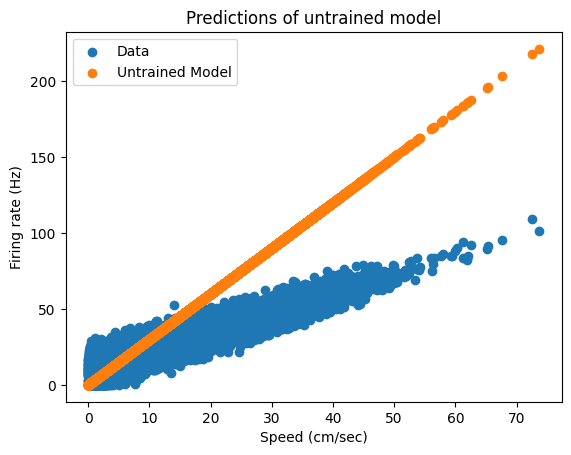

In [155]:
plt.scatter(speed,rate,label="Data")
plt.scatter(speed,yhat,label="Untrained Model")
plt.title("Predictions of untrained model")
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()
plt.show()

In [156]:
untrained_yhat=yhat

Our untrained models is a pretty bad predictor of the firing rate of the neuron.

Let's try to improve this.

## Measuring model performance

To be able to train any model, you need a measure of how bad it is doing it is doing. This is usually refer to as a `cost or loss function`.

For linear regression model, the mean squared error (MSE) is often used. 


$MSE = \frac{1}{m} \sum_{i = 1}^{m}(\hat{y}^{i} - y^{i})^2$, where

* $m$ is the number of data points
* $y$ is the measured dependent variable (firing rate of the neuron) 
* $\hat{y}$ is the prediction of the model


### Exercise:

Calculate the mean squared error (MSE) for our untrained model

The task of the training loop (machine learning) in this exercise is to modify the model parameters to reduce the MSE to the smallest value possible.

## Training procedure using gradient descent

We want to tweak the parameters with the goal of reducing the MSE. 

One way to do this is to use an optimization algorithm called **gradient descent**. 

Gradient descent is capable of finding optimal solutions to many type of problems/functions.


<div>
<img src="../images/gradient_descent.png" width="1000"/>
</div>


With gradient descent, we calculate the slope of the loss function with the current parameters, then we change the parameters so that we move down the slope. 

The amount by which we move down the slope is controlled by a model hyperparameter called `learning rate`.

The model hyperparameters are not optimized from the data. They control how the model learns. 

We can have a look at the cost function as a function of different values of $\theta_1$ or $w$. This is the slope of our model.

In [157]:
print(rate.shape)
rateM = np.expand_dims(rate,0)
print(rateM.shape)

(27304,)
(1, 27304)


In [158]:
theta = np.array([[10.0,2.0]]) 

In [159]:
theta.shape, X.shape

((1, 2), (2, 27304))

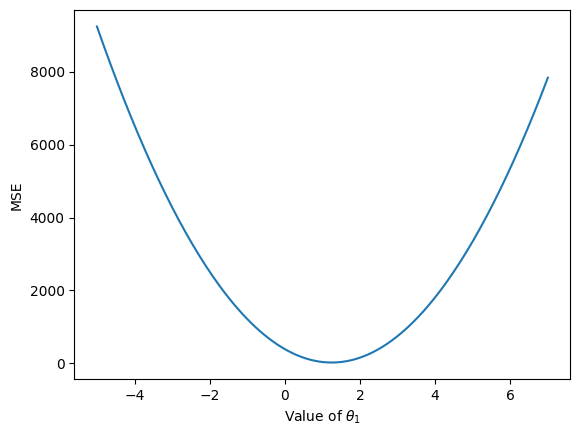

In [160]:
nDataPoints=200
theta[0,0]=10.0 # I am cheating and set b to the correct value to see if the loss function will have a minimum at the correct value of w

res = np.empty(nDataPoints)
param_values = np.linspace(-5.0,7.0,nDataPoints)
for i,t in enumerate(param_values):
    theta[0,1]=t # change the second parameter of the model
    res[i] = np.mean((rateM-theta@X)**2)
plt.plot(param_values,res)
plt.xlabel(r"Value of $\theta_1$")
plt.ylabel("MSE")
plt.show()

### Partial derivative of the cost function

To be able to adjust the parameters in the right direction, we need to know the slope for a specific value of $\theta$.

This is called the partial derivative for our parameters.

For the case of the MSE, the formula for the partial derivative is:

$\nabla_{\theta}MSE(\theta) = \frac{2}{m} (\theta X - y)X^{T}$

In [161]:
m = X.shape[1] # number of observations

In [162]:
theta = np.array([[1.0,-2.250]]) 

In [163]:
2/m *(theta@X - rateM) @ X.T

array([[  -95.69985781, -1850.88176943]])

In the training loop, negative gradients mean that you increase the values of the coefficients to reduce the MSE.

Because we use all observations to calculate the gradients, this is called **batch gradient descent**.

For more complex models, you can use [pytorch](https://pytorch.org/) to calculate the derivative for you automatically.

### Our first training loop

This is a simple training loop. We loop several times and make small adjustments to the coefficients on each iteration.

In [164]:
lr = 0.002 # learning rate
n_iterations = 6000 
m = rate.shape[0] # number of data points

#theta = np.random.rand(2) # set random parameters as a starting point
theta = np.array([[20.0,-2.0]]) 
print("theta at start:", theta)

# learning loop
for iteration in range(n_iterations):

    # calculate the gradients with the current parameters
    gradients = 2/m *(theta@X - rateM) @ X.T
    
    # adjust the parameter so that we reduce the MSE
    theta = theta - lr * gradients

    if iteration%1000 == 0 or iteration<10:  
        print("iteration:{}, gradients: {}".format(iteration,gradients))

print("optimized theta:",theta)

theta at start: [[20. -2.]]
iteration:0, gradients: [[  -52.15084935 -1311.14946545]]
iteration:1, gradients: [[  6.26238986 -71.02892793]]
iteration:2, gradients: [[ 9.39046127 -4.25126716]]
iteration:3, gradients: [[ 9.54162197 -0.6546724 ]]
iteration:4, gradients: [[ 9.53251774 -0.46019386]]
iteration:5, gradients: [[ 9.51481663 -0.44891082]]
iteration:6, gradients: [[ 9.49668544 -0.44749388]]
iteration:7, gradients: [[ 9.47856388 -0.44660973]]
iteration:8, gradients: [[ 9.46047555 -0.44575582]]
iteration:9, gradients: [[ 9.44242167 -0.44490508]]
iteration:1000, gradients: [[ 1.42223898 -0.06701261]]
iteration:2000, gradients: [[ 0.21056955 -0.00992155]]
iteration:3000, gradients: [[ 0.03117587 -0.00146893]]
iteration:4000, gradients: [[ 0.00461574 -0.00021748]]
iteration:5000, gradients: [[ 6.83383594e-04 -3.21994546e-05]]
optimized theta: [[10.0631432   1.24493397]]


## Exercise: 

* Use our optimized model to make rate predictions 
* Plot the predicted and observed firing rates as a function of running speed. 

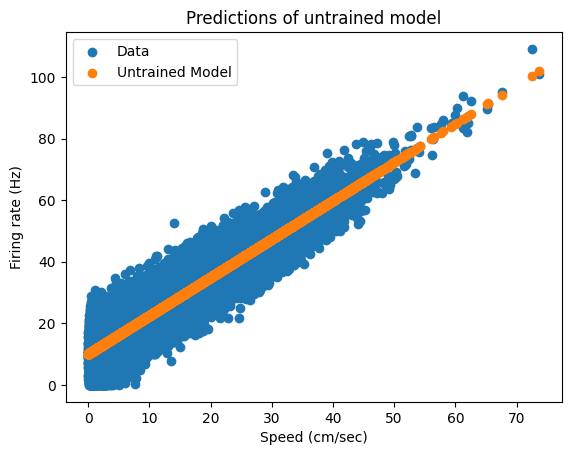

In [165]:
yhat = theta@X # prediction of the model
plt.scatter(speed,rate,label="Data")
plt.scatter(speed,yhat,label="Untrained Model")
plt.title("Predictions of untrained model")
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()
plt.show()

### Visualisation of the training process

Here I created a small animation to visualize the training process. 

Don't worry about all the details relating to plotting the data. The training process is exactly the same as above. 

We save training parameters $w$ and $b$, the MSE and the gradients in numpy arrays at each iteration, and use this data to generate a plot for each iteration. We then put all images together to create an animation.

The code takes approximately a minute to run.

In [166]:
import imageio
import os

In [167]:
lr = 0.002
n_epochs = 3000 # how many time we go through the data during the learning process, one epoch = one pass through the data.
m = rate.shape[0]
theta = np.array([[-10,-10]])

# variables for our animation
animation_dir = "../images/learning_animation/"
imageFileNames = []
save_every = 25

# arrays to store the results at each iteration
mseLearning = np.empty(n_epochs)
tLearning = np.empty((n_epochs,2))
gradLearning = np.empty((n_epochs,2))


for epoch in range(n_epochs):
    gradients = 2/m *(theta@X - rateM) @ X.T
    
    # save results for the animation
    mseLearning[epoch] = np.mean((rate-theta@X)**2)
    tLearning[epoch,:] = theta
    gradLearning[epoch,:] = gradients
    
    
    # change the parameters
    theta = theta - lr * gradients
    
    
    # make one figure for our animation

    if epoch < 5 or epoch % save_every == 0:
        fn = os.path.join(animation_dir,"image_{}.png".format(epoch))
        imageFileNames.append(fn)
        fig, ax = plt.subplots(1,4,figsize=(13,3),layout="constrained")
    
        # plot the MSE
        ax[0].plot(np.arange(epoch),mseLearning[:epoch])
        ax[0].set_xlim(0,n_epochs)
        ax[0].set_ylim(0,200)
        ax[0].set_xlabel("Epochs")
        ax[0].set_ylabel("Loss (MSE)")
        ax[0].spines['top'].set_visible(False)
        ax[0].spines['right'].set_visible(False) 
        ax[0].set_title("MSE")
        
        # plot the gradients
        ax[1].plot(np.arange(epoch),gradLearning[:epoch,1],label="$w$ gradient")
        ax[1].plot(np.arange(epoch),gradLearning[:epoch,0],label="$b$ gradient")
        ax[1].set_xlim(0,n_epochs)
        ax[1].set_ylim(-10,1)
        ax[1].set_xlabel("Epochs")
        ax[1].set_ylabel("Gradients")
        ax[1].legend(loc=4)
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False) 
        ax[1].set_title("Gradients")
    
        # plot the parameters
        ax[2].scatter(tLearning[:epoch,0],tLearning[:epoch,1],color="gray",s=3,alpha=0.5)
        ax[2].scatter(tLearning[epoch,0],tLearning[epoch,1],color="red",s=5)
        ax[2].set_xlim(-10,12)
        ax[2].set_ylim(-0.5,3)
        ax[2].set_xlabel("$b$")
        ax[2].set_ylabel("$w$")
        ax[2].text(-0.5, 2.5, "Epoch {}/{}".format(epoch,n_epochs))
        ax[2].spines['top'].set_visible(False)
        ax[2].spines['right'].set_visible(False)
        ax[2].set_title("Parameters")
    
        # plot the data and regression line
        x=np.arange(70)
        y = x*theta[0,1] + theta[0,0]
        
        
        ax[3].scatter(speed[::10],rate[::10],label="Data",alpha=0.5,s=1) # only plot every 10 data points to speed up plot function
        ax[3].plot(x,y,label="Model",color="red")
        ax[3].set_xlabel("Speed (cm/sec)")
        ax[3].set_ylabel("Firing rate (Hz)")
        ax[3].set_xlim(0,70)
        ax[3].set_ylim(-10,130)
        ax[3].legend(loc=4)
        ax[3].set_title("Data and Model")
        ax[3].spines['top'].set_visible(False)
        ax[3].spines['right'].set_visible(False)
        
        plt.savefig(fn)
        plt.close()
 
print("optimized theta:",theta)


optimized theta: [[9.99978442 1.24791929]]


We can make the animation from our saved image

In [168]:
fn = os.path.join(animation_dir,"learning_animation.gif")
with imageio.get_writer(fn, mode='I') as writer:
    for filename in imageFileNames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)
# Remove files
for filename in set(imageFileNames):
    os.remove(filename)

<img src="../images/learning_animation/learning_animation.gif" width="1000" align="center">

## Alternative ways to find the best parameters

### sklearn.linear_model.LinearRegression

Scikit-Learn had built in classes to train linear and non-linear regression models. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [169]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.T,rate)
lin_reg.intercept_,lin_reg.coef_

(10.063037158949758, array([0.        , 1.24493896]))

### scipy.optimize.minimize()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

This is a function that can be used to minimize several types of functions. It is not limited to linear regressions

scipy.optimize.minimize() takes several arguments:

* fun: an objective function that will be minimized
* x0: a vector with the model parameters
* args: additional parameters that are passed to the objective function




In [170]:
from scipy.optimize import minimize

# optimize() will try to minimize the value returned by objective_function()
# in our example, we can return the mean squared error of our model
def objective_function(x0,X,rate): 
    delta=x0
    yhat = X@delta
    mse = np.mean((rate-yhat)**2)
    return mse

x0 = np.array([15, 1]) # parameters to optimize
results = minimize(objective_function,x0,args=(X.T,rate))
print(results)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 24.9514247109425
        x: [ 1.006e+01  1.245e+00]
      nit: 4
      jac: [ 2.384e-07  0.000e+00]
 hess_inv: [[ 1.046e+00 -4.917e-02]
            [-4.917e-02  4.431e-03]]
     nfev: 24
     njev: 8


We get the same results.

Note that we did not have to calculate the partial derivative directly.

### pytorch

pytorch is a platform use principally to train deep neural network. 

pytorch can calculate the derivative for you. The computations can be sent to the GPU if needed (not implemented here)


In [176]:
import torch

# linear model making prediction
def model(X,delta):
    return delta@X
# loss function returning MSE
def loss_fn(y,yhat):
    squared_diff = (y-yhat)**2
    return squared_diff.mean()

# model parameters stored as a pytorch tensor. This makes the calculation of the gradients possible
 
delta = torch.tensor([[20.0,-2.0]],requires_grad =True)
print("delta at start:", delta)

# We transform our data from NumPy array to Pytorch tensors. There is no need for gradients
XTensor = torch.tensor(X,dtype=torch.float32)
rateTensor= torch.tensor(rate,dtype=torch.float32)

# let's run the model once and calculate the loss
yhat = model(XTensor,delta)
loss = loss_fn(yhat,rateTensor)
print("loss:",loss)
loss.backward()

print("gradients: ",delta.grad)

# We need to zero the gradients; otherwise, they accumulate
delta.grad.zero_()


delta at start: tensor([[20., -2.]], requires_grad=True)
loss: tensor(1893.1407, grad_fn=<MeanBackward0>)
gradients:  tensor([[  -52.1509, -1311.1495]])


tensor([[0., 0.]])

In [177]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, learning_rate, delta, XTensor,rateTensor):
    for epoch in range (n_epochs):

        if delta.grad is not None:
            delta.grad.zero_() 
        
        yhat = model(XTensor,delta)
        loss = loss_fn(yhat,rateTensor)
        loss.backward()
        
        with torch.no_grad():
            delta -= learning_rate * delta.grad
        
        if epoch % 1000 ==0:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return delta

In [178]:
opt_delta = training_loop(n_epochs = 10000,
                          learning_rate = 0.001,
                          delta = torch.tensor([10.0,-2.0],requires_grad =True),
                          XTensor = XTensor,
                          rateTensor=rateTensor)
print(opt_delta)

Epoch: 0, Loss: 2514.649169921875
Epoch: 1000, Loss: 24.951993942260742
Epoch: 2000, Loss: 24.951509475708008
Epoch: 3000, Loss: 24.951438903808594
Epoch: 4000, Loss: 24.951427459716797
Epoch: 5000, Loss: 24.95142364501953
Epoch: 6000, Loss: 24.951427459716797
Epoch: 7000, Loss: 24.951427459716797
Epoch: 8000, Loss: 24.951427459716797
Epoch: 9000, Loss: 24.951427459716797
tensor([10.0635,  1.2449], requires_grad=True)


Once again we found our initial parameters.

This type of output is very similar to what you see when you train DeepLabCut (more on this next week).

## Summary

* We implemented a linear regression model in python.
* We defined a cost function (MSE) to measure how good/bad the model predictions are.
* We calculated the partial derivative of the MSE for a set of coefficients.
* We wrote a training loop to adjust the coefficients iteratively in order to minimize MSE
* We covered 3 possible ways in which you can train models (klearn.linear_model, scipy.optimize.minimize and pytorch)
